<a href="https://colab.research.google.com/github/Devin-Peterson/food-sales-predictions/blob/main/05Food_Sales_Predictions(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/Data/sales_predictions.csv'

In [4]:
df = pd.read_csv(filename)
df 
#8523 rows and 12 columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Variable Name	Description:**

**Item_Identifier**	Unique product ID

**Item_Weight**	Weight of product

**Item_Fat_Content**	Whether the product is low fat or regular
Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product

**Item_Type**	The category to which the product belongs

**Item_MRP**	Maximum Retail Price (list price) of the product

**Outlet_Identifier**	Unique store ID

**Outlet_Establishment_Year**	The year in which store was established

**Outlet_Size**	The size of the store in terms of ground area covered

**Outlet_Location_Type**	The type of area in which the store is located

**Outlet_Type**	Whether the outlet is a grocery store or some sort of supermarket

**Item_Outlet_Sales**	Sales of the product in the particular store. This is the target variable to be predicted.

In [5]:
#2. Data types for each variable
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Verify that there are no duplicate items
df.duplicated().sum() 

0

In [7]:
df.duplicated().any()

False

In [8]:
# Identify missing values. 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df[df.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [10]:
#5. Decide on how to address the missing values (explain your choice)

In [11]:
df.drop(columns = ['Outlet_Size'], inplace = True) 
# I believe Outlet Size is irrelevant. Especially since we are given the Outlet Type.

In [12]:
average_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(average_weight, inplace=True)
#I believe the item weight might be relevent to future analysis, so I decided to use the average weight instead of dropping the column or filling the unknowns with 'Missing'

In [13]:
#6. Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
#7. Address inconsistent catagories of data
df['Item_Fat_Content'].value_counts() # Condense items

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')

In [16]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [17]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [18]:
df['Item_Fat_Content'].value_counts() #Verifying correction

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Item_Type'].value_counts() #Good

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [20]:
#Since we are predicting food sales, I would like to drop all rows containing 'Household', 'Health and Hygiene', and 'Others'
df=df[(df.Item_Type!= 'Household') & (df.Item_Type!= 'Health and Hygiene') & (df.Item_Type!= 'Others')]

In [21]:
#Verify that both types were eliminated from Item Types
df['Item_Type'].value_counts() #Good

Fruits and Vegetables    1232
Snack Foods              1200
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [22]:
df['Outlet_Location_Type'].value_counts() #Good

Tier 3    2709
Tier 2    2271
Tier 1    1944
Name: Outlet_Location_Type, dtype: int64

In [23]:
df['Outlet_Type'].value_counts() #Good

Supermarket Type1    4538
Grocery Store         870
Supermarket Type3     761
Supermarket Type2     755
Name: Outlet_Type, dtype: int64

In [24]:
#8. For any numerical columns, obtain the summary statistics of each
df['Item_Weight'].describe()

count    6924.000000
mean       12.762487
std         4.191972
min         4.555000
25%         9.300000
50%        12.857645
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [25]:
df['Item_Visibility'].describe()
#Why is zero an option for item visability? Error in data?

count    6924.000000
mean        0.067728
std         0.051938
min         0.000000
25%         0.028529
50%         0.055839
75%         0.097416
max         0.328391
Name: Item_Visibility, dtype: float64

In [26]:
df['Item_MRP'].describe()

count    6924.000000
mean      140.847375
std        62.418788
min        31.290000
25%        92.535700
50%       143.014100
75%       186.066100
max       266.888400
Name: Item_MRP, dtype: float64

In [27]:
df['Outlet_Establishment_Year'].describe()
#Research sales difference between oldest and newest outlets

count    6924.000000
mean     1997.849509
std         8.373427
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [28]:
df['Item_Outlet_Sales'].describe()
#Notice the range between sales min: 33.29 vs max: 13086.96

count     6924.000000
mean      2190.195544
std       1724.348967
min         33.290000
25%        838.908000
50%       1779.017600
75%       3113.280800
max      12117.560000
Name: Item_Outlet_Sales, dtype: float64

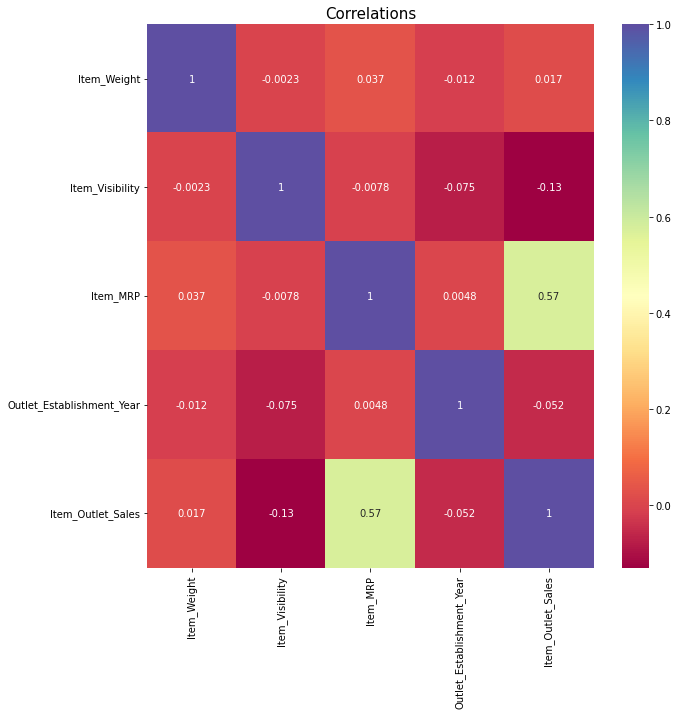

In [29]:
#I would like to quickly see if there are any correlations within my dataset with a heatmat
plt.figure(figsize=(10,10));
sns.heatmap(df.corr(), cmap='Spectral', annot=True);
plt.title('Correlations', fontsize = 15);
#There is moderate correlation between 'Item_MRP' (maximum retail price) and 'Item_Outlet_Sales'. This makes sense. If an item is being sold at a higher price, this would also increase the Outlet total sales for that item.
#I find it interesting that the most negative correlation is between 'item_visabiliity' and 'item_Outlet_sales'. 
#One would have thought that the more visable an item is, the more likely customers would be drawn to the product and increase the volume of sales, not the opposite. So much for product placement. 

In [30]:
#Exploring what type of foods that dominate our data set.
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

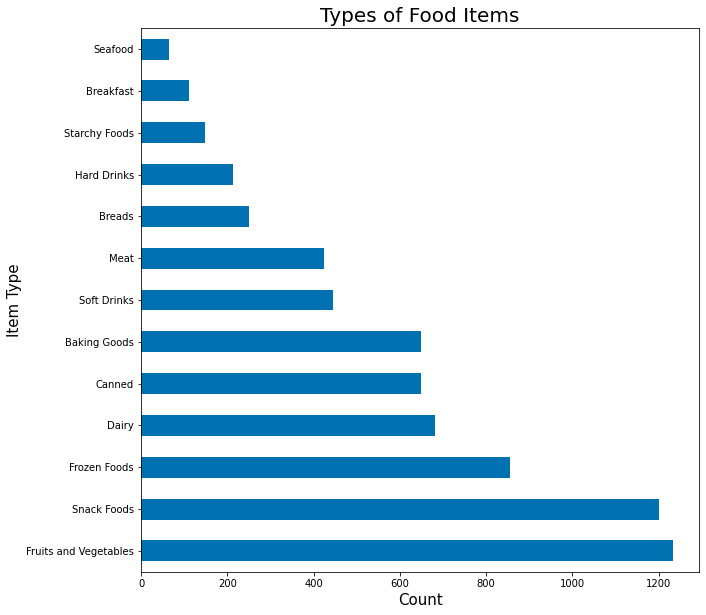

In [31]:
# Create a visual
plt.figure(figsize=(10,10));
plt.style.use('seaborn-colorblind')
df['Item_Type'].value_counts().plot(kind='barh')
plt.title('Types of Food Items', fontsize= 20);
plt.xlabel('Count',fontsize= 15);
plt.ylabel('Item Type', fontsize= 15);
#We can see here that 'Fruits and Vegetables' and 'Snack Foods' dominate this list.

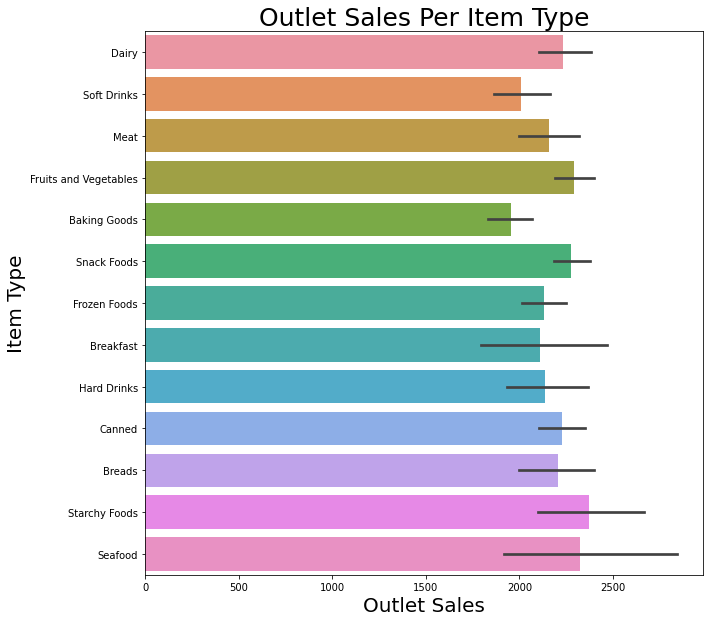

In [32]:
# Now lets explore the relationship between the 'Item_Type' and the 'Item_Outlet_Sales'
plt.figure(figsize=(10,10));
plt.style.use('seaborn-colorblind')
sns.barplot(data=df, y='Item_Type', x='Item_Outlet_Sales');
plt.title('Outlet Sales Per Item Type', fontsize= 25);
plt.xlabel('Outlet Sales',fontsize=20);
plt.ylabel('Item Type', fontsize=20);
#This graph shows us that even though 'Fruits and Vegetables' and 'Snack Foods' dominated the data count for 'type', the other types of foods can still bring in nearly as much in sales.
# Especially seafood and starchy foods. They are among the lowest item count, but bring in some of the  top sales numbers! Wow!

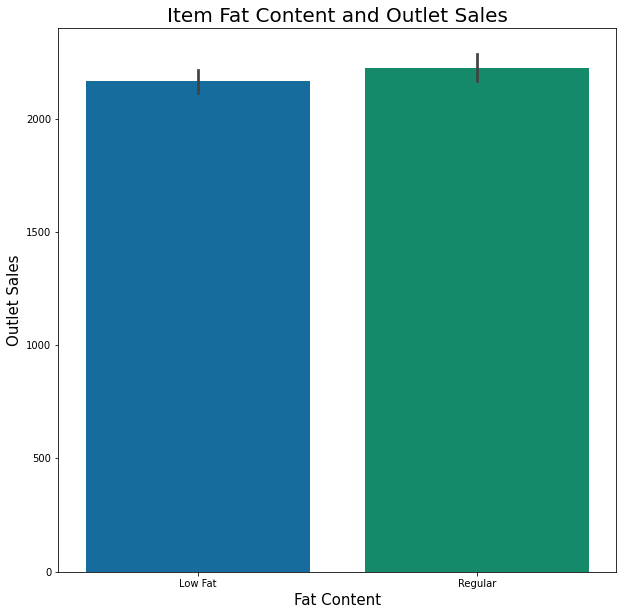

In [33]:
#Comparing the relationship between the items fat content and the total sales to see if customers perfer to spend more of their hard earned money on the tasty fattier foods.
plt.figure(figsize=(10,10));
sns.barplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales');
plt.title('Item Fat Content and Outlet Sales', fontsize = 20);
plt.xlabel('Fat Content', fontsize = 15);
plt.ylabel('Outlet Sales', fontsize = 15);
#We can see that these two plots are very similar, meaning that the total of sales are pretty similar despite one option being considered more healthy. 
# In summary, the fat content has no effect on sales. 

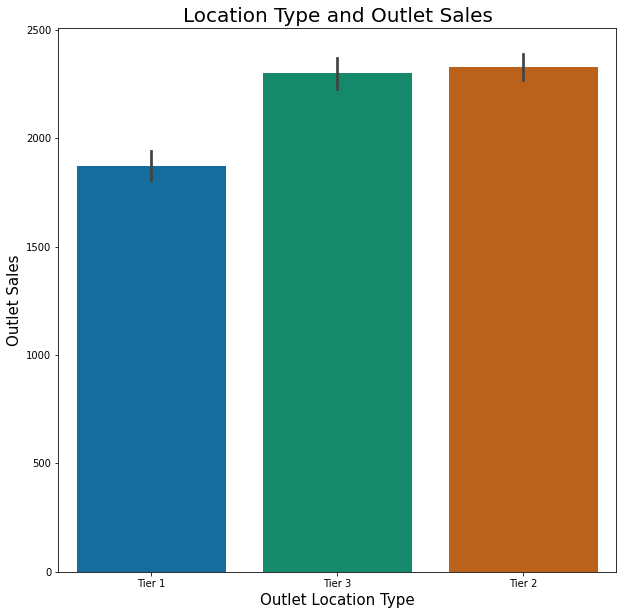

In [34]:
# Comparing the relationship between the 'Outlet Location Type' and the 'Item Outlet Sales'
plt.figure(figsize=(10,10));
ax = sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales');
plt.title('Location Type and Outlet Sales', fontsize = 20);
plt.xlabel('Outlet Location Type', fontsize = 15);
plt.ylabel('Outlet Sales', fontsize = 15);
# Overall the Tier 2 and 3 outlet locations tend to do better, although the differnce isnt't drastic.

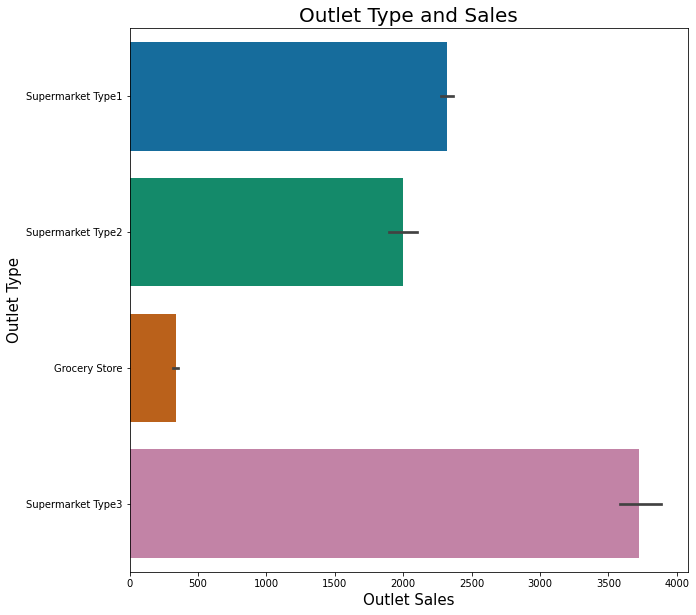

In [35]:
# Comparing the relationship between the 'Outlet Type' and the 'Item Outlet Sales'
plt.figure(figsize=(10,10));
ax = sns.barplot(data=df, y='Outlet_Type', x='Item_Outlet_Sales');
plt.title('Outlet Type and Sales', fontsize = 20);
plt.ylabel('Outlet Type', fontsize = 15);
plt.xlabel('Outlet Sales', fontsize = 15);
# It is clear that 'Supermarket Type 3' is the ideal type of outlet, while the 'Grocery Store' is the elast desirable. 

Overall, a Supermarket Type 3 in a Tier 2 location would generate the greatest outlet sales. 

In [36]:
# Let's explore that types of items bring in the most money for the Type 3 Supermarket.
type_3 = df[df['Outlet_Type']=='Supermarket Type3']
type_3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
18,DRI11,12.857645,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.857645,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Tier 3,Supermarket Type3,4064.0432
36,FDV20,12.857645,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Tier 3,Supermarket Type3,2797.6916
38,FDX10,12.857645,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Tier 3,Supermarket Type3,388.1614
...,...,...,...,...,...,...,...,...,...,...,...
8435,FDT48,12.857645,Low Fat,0.000000,Baking Goods,196.5084,OUT027,1985,Tier 3,Supermarket Type3,793.6336
8444,FDO28,12.857645,Low Fat,0.071948,Frozen Foods,121.6098,OUT027,1985,Tier 3,Supermarket Type3,482.0392
8463,FDG59,12.857645,Low Fat,0.043025,Starchy Foods,37.6164,OUT027,1985,Tier 3,Supermarket Type3,810.9444
8485,DRK37,12.857645,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Tier 3,Supermarket Type3,6261.8490


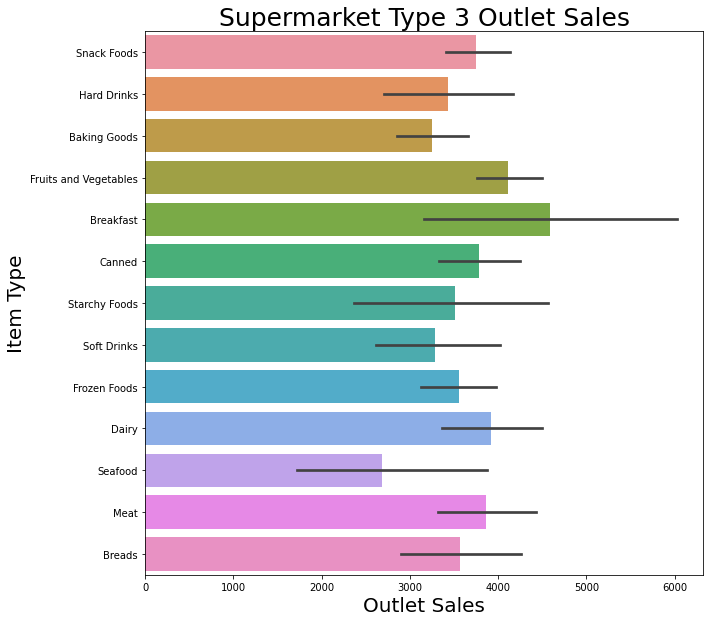

In [37]:
plt.figure(figsize=(10,10));
plt.style.use('seaborn-colorblind')
sns.barplot(data=type_3, y='Item_Type', x='Item_Outlet_Sales');
plt.title('Supermarket Type 3 Outlet Sales', fontsize= 25);
plt.xlabel('Outlet Sales',fontsize=20);
plt.ylabel('Item Type', fontsize=20);
# Breakfast foods are suprisingly the leader in sales for Supermarket Type 3. However, 

# Machine Learning

In [42]:
df = df.drop(columns = 'Item_Identifier')

In [43]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088


## Ordinal Encoding

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6924 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6924 non-null   float64
 1   Item_Fat_Content           6924 non-null   object 
 2   Item_Visibility            6924 non-null   float64
 3   Item_Type                  6924 non-null   object 
 4   Item_MRP                   6924 non-null   float64
 5   Outlet_Identifier          6924 non-null   object 
 6   Outlet_Establishment_Year  6924 non-null   int64  
 7   Outlet_Location_Type       6924 non-null   int64  
 8   Outlet_Type                6924 non-null   object 
 9   Item_Outlet_Sales          6924 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 853.1+ KB


Numerical - Item_weight, Item_Visibility, Item_MRP, Outlet_Est_Year, Item_Outlet_Sales

Ordinal - Outlet_Location_Type, Outlet_Type

Nominal - Item_Fat_Content, Item_Type, Outlet_Identifier, 

In [45]:
df['Outlet_Location_Type'].value_counts()

Tier 3    2709
Tier 2    2271
Tier 1    1944
Name: Outlet_Location_Type, dtype: int64

In [ ]:
replacement_dict = {'Tier 1':1, 'Tier 2':2, 'Tier 3':3}
df['Outlet_Location_Type'].replace(replacement_dict, inplace=True)
df['Outlet_Location_Type']

In [ ]:
df['Outlet_Type'].value_counts()

In [ ]:
replacement_dict2 = {'Grocery Store':0, 'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':3}
df['Outlet_Type'].replace(replacement_dict2, inplace=True)
df['Outlet_Type']

In [50]:
df.info()
# Verifying changes in dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6924 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6924 non-null   float64
 1   Item_Fat_Content           6924 non-null   object 
 2   Item_Visibility            6924 non-null   float64
 3   Item_Type                  6924 non-null   object 
 4   Item_MRP                   6924 non-null   float64
 5   Outlet_Identifier          6924 non-null   object 
 6   Outlet_Establishment_Year  6924 non-null   int64  
 7   Outlet_Location_Type       6924 non-null   int64  
 8   Outlet_Type                6924 non-null   int64  
 9   Item_Outlet_Sales          6924 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 853.1+ KB


## Validation Split

In [39]:
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

## Column Selectors

In [51]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [55]:
scaler = StandardScaler()
median_imputer = SimpleImputer(strategy = 'median')
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

## Pipelines

In [56]:
preprocessing_pipeline = make_pipeline(median_imputer, scaler)
preprocessing_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])